**Llamada a librerías**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Carga de los datos**

In [ ]:
import gdown
from google.colab import drive
url = 'https://drive.google.com/uc?export=download&id=1tx_DfcRae_eBljFEvLufJ_dah1-ZdHQt'
gdown.download(url, 'FRvideos_cc50_202101.csv', quiet=False)
drive.mount('/content/drive')
df = pd.read_csv('FRvideos_cc50_202101.csv')
df_original = df

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1tx_DfcRae_eBljFEvLufJ_dah1-ZdHQt
From (redirected): https://drive.google.com/uc?export=download&id=1tx_DfcRae_eBljFEvLufJ_dah1-ZdHQt&confirm=t&uuid=9703ed8d-974d-4e08-8f98-22cf164d6b51
To: /content/FRvideos_cc50_202101.csv
100%|██████████| 54.5M/54.5M [00:01<00:00, 42.9MB/s]


Mounted at /content/drive


**Análisis de datos**


Visualización inicial de los datos

In [ ]:
df.head(3).transpose()

,0,1,2
video_id,Ro6eob0LrCY,Yo84eqYwP98,ceqntSXE-10
trending_date,17.14.11,17.14.11,17.14.11
title,Malika LePen : Femme de Gauche - Trailer,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...
channel_title,Le Raptor Dissident,Le Labo,Daniil le Russe
category_id,24,24,23
publish_time,2017-11-13T17:32:55.000Z,2017-11-12T15:00:02.000Z,2017-11-13T17:00:38.000Z
tags,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",[none],"cartoon""|""pokémon""|""école""|""ours""|""мультфильм"
views,212702,432721,482153
likes,29282,14053,76203
dislikes,1108,576,477


Rastreo de los tipos de datos por columna.

In [ ]:
df.dtypes

,0
video_id,object
trending_date,object
title,object
channel_title,object
category_id,int64
publish_time,object
tags,object
views,int64
likes,int64
dislikes,int64


Visualización de columnas de interés ("comments_disabled", "ratings_disabled" y "video_error_or_removed")

In [ ]:
def visualizar(datos, columna, val1, val2, tit):
  # Relacion True y False
  cantidades = datos[columna].value_counts()
  # Colores de las barras
  colores = sns.color_palette('deep', n_colors=2)
  # Crear el gráfico de barras
  plt.figure(figsize=(5,5))
  plt.ylim(0, 1.1*max(cantidades))
  cantidades.plot(kind='bar', color = colores)
  plt.xlabel("Estado de la variable")
  plt.ylabel("Cantidad de registros")
  plt.title(f"Cantidad de videos por valor en {columna}")
  # Colocar nums
  for i in range(len(cantidades)):
    plt.text(i, 1.02*cantidades[i], cantidades[i], ha='center', va='bottom')
  # Leyenda
  leyenda = [plt.Rectangle((0, 0), 1, 1, color=colores[i]) for i in range(len(cantidades))]
  plt.legend(leyenda, [val1, val2], title=tit)
  plt.show()

<ipython-input-7-31cf21c1bd49>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, 1.02*cantidades[i], cantidades[i], ha='center', va='bottom')


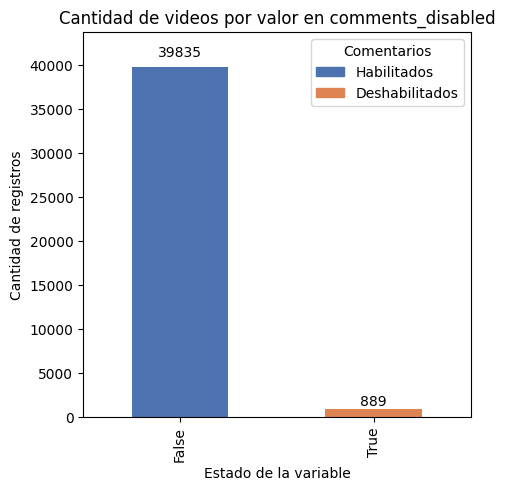

In [ ]:
visualizar(df, 'comments_disabled', 'Habilitados', 'Deshabilitados', 'Comentarios')

<ipython-input-7-31cf21c1bd49>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, 1.02*cantidades[i], cantidades[i], ha='center', va='bottom')


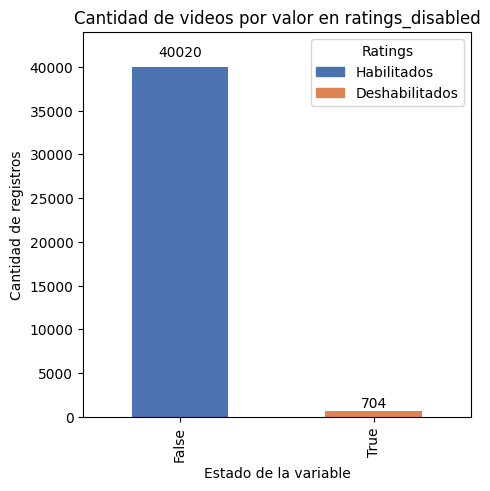

In [ ]:
visualizar(df, 'ratings_disabled', 'Habilitados', 'Deshabilitados', 'Ratings')

<ipython-input-7-31cf21c1bd49>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, 1.02*cantidades[i], cantidades[i], ha='center', va='bottom')


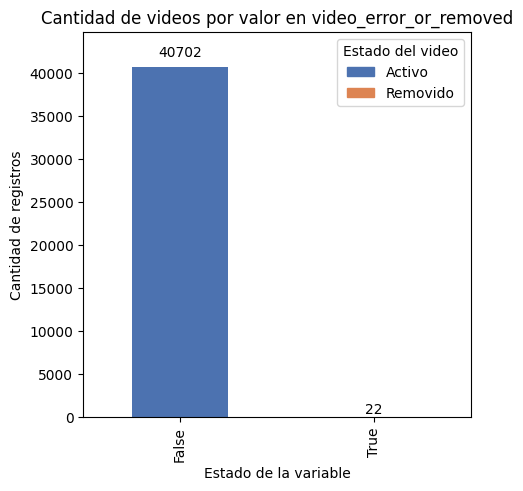

In [ ]:
visualizar(df, 'video_error_or_removed', 'Activo', 'Removido', 'Estado del video')

Análisis previo de valores atípicos

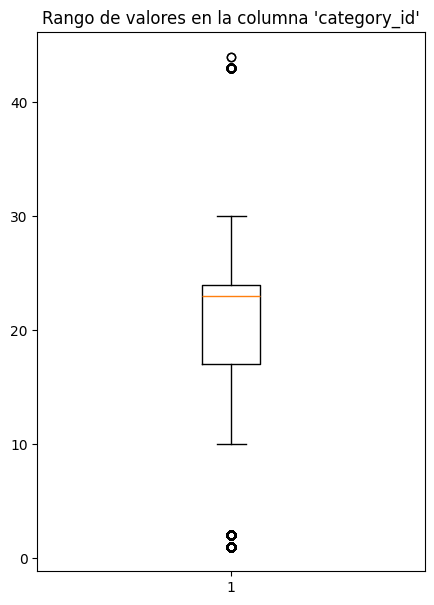

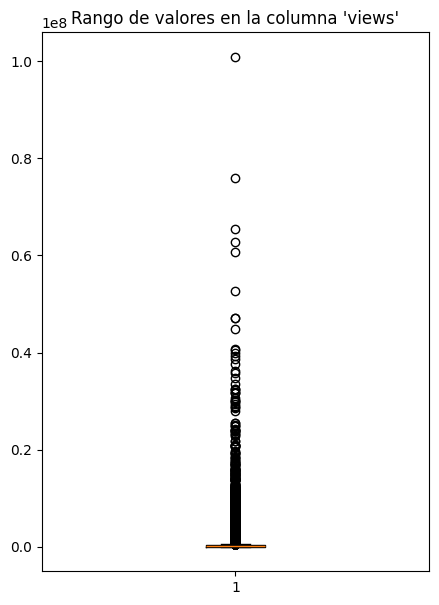

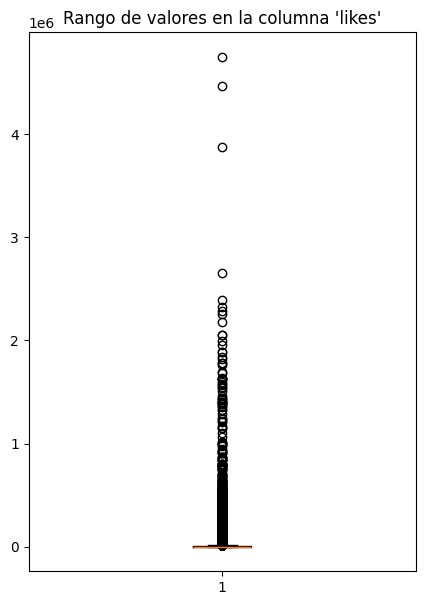

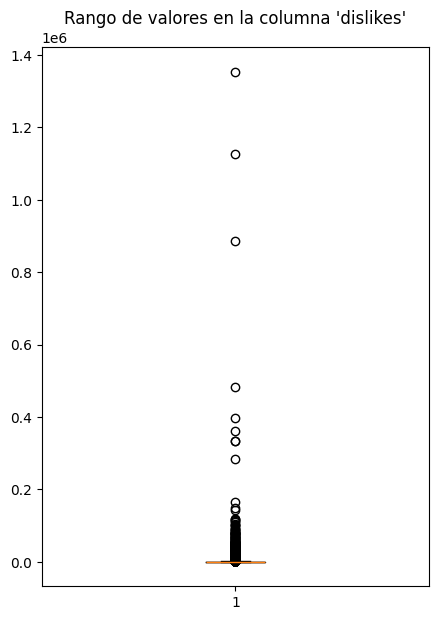

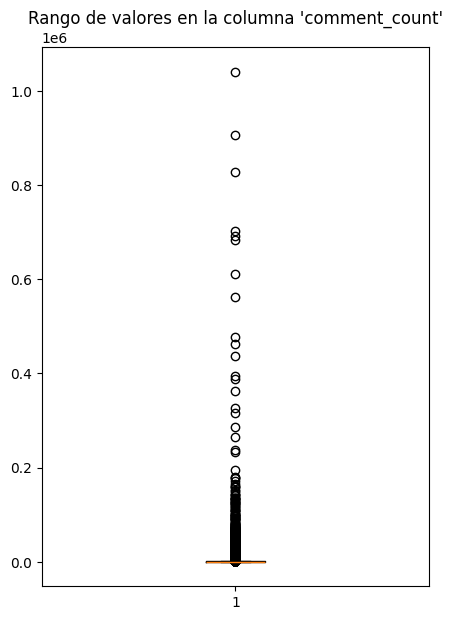

In [ ]:
for elem in list(df.columns):
    if df[elem].dtype == np.int64:
      plt.figure(figsize=(5,7))
      plt.boxplot(df[elem])
      plt.title(f"Rango de valores en la columna '{elem}'")
      plt.show()

Formación de un diccionario para los nombres de las categorias

In [ ]:
categorias = {
  1: "Film & Animation",
  2: "Autos & Vehicle",
  10: "Music",
  15: "Pets & Animals",
  17: "Sports",
  19: "Travel & Events",
  20: "Gaming",
  22: "People & Blogs",
  23: "Comedy",
  24: "Entertainment",
  25: "News & Politics",
  26: "Howto & Style",
  27: "Education",
  28: "Science & Technology",
  29: "Nonprofits & Activism",
  30: "Movies",
  43: "Shows",
  44: "Trailers"
}




# **PRE-PROCESAMIENTO Y ANÁLISIS DE LOS DATOS**

Se transforma la fecha "trending_date" a un foramto más adecuado.

In [ ]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

Se crean las nuevas variables/columnas antes de pre-procesar las demás columnas.

Es decir, se usan los valores originales.

In [ ]:
# Se establece la columna ratio_likes_dislikes, la cual contendrá el ratio entre likes y dislikes
# Se agrega 1 a dislikes para evitar division entre 0, lo cual genera un ratio infinito
df['ratio_likes_dislikes'] = df['likes'] / (df['dislikes'] + 1)
# Se limita el tamaño del ratio, para evitar valores atipicos extremadamente altos
df['ratio_likes_dislikes'] = df['ratio_likes_dislikes'].clip(lower=0, upper=100)

# Mismo procedimiento para views y comments
# Se establece la columna ratio_views_comments
df['ratio_views_comments'] = df['views'] / (df['comment_count'] + 1)
df['ratio_views_comments'] = df['ratio_views_comments'].clip(lower=0, upper=1500)

Calcular la cantidad de valores faltantes por columna

In [ ]:
missing_values = df.isnull().sum()

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (missing_values / len(df)) * 100

# Análisis de datos
missing_data = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje Faltante': missing_percentage
})

# Filtrar columnas con valores faltantes
missing_data = missing_data[missing_data['Valores Faltantes'] > 0]

# Mostrar los resultados
print(missing_data)


             Valores Faltantes  Porcentaje Faltante
description               2912             7.150575


Completar datos faltantes con 'Sin descripción' en la columna "description"

In [ ]:
# Rellenar valores faltantes en la columna 'description' con "Sin descripción"
df['description'].fillna("Sin descripción", inplace=True)

# Verificar que no haya valores faltantes en la columna 'description'
missing_after_fill = df['description'].isnull().sum()

# Mostrar el resultado
print(f"Valores faltantes en 'description' después de completar: {missing_after_fill}")

Valores faltantes en 'description' después de completar: 0


<ipython-input-16-0f55c4f26d67>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna("Sin descripción", inplace=True)


Reemplazar datos equivalentes a 0 en columnas "comment_count", "likes" y "dislikes".

Dependencias: "comments_disabled" y "ratings_disabled".

In [ ]:
# Se guardan las medianas de cada columna
median_comment = df["comment_count"].median()
median_likes = df["likes"].median()
median_dislikes = df["dislikes"].median()
# Reemplazar por mediana si comments_disabled == true
df.loc[df["comments_disabled"] == True, "comment_count"] = median_comment
# Reemplazar por mediana si ratings_disabled == true
df.loc[df["ratings_disabled"] == True, "likes"] = median_likes
df.loc[df["ratings_disabled"] == True, "dislikes"] = median_dislikes
# Contar ceros
cant_comment_0 = (df["comment_count"] == 0).sum()
cant_likes_0 = (df["likes"] == 0).sum()
cant_dislikes_0 = (df["dislikes"] == 0).sum()
print(f"Cantidad de ceros en comment_count: {cant_comment_0}")
print(f"Cantidad de ceros en likes: {cant_likes_0}")
print(f"Cantidad de ceros en dislikes: {cant_dislikes_0}")

Cantidad de ceros en comment_count: 387
Cantidad de ceros en likes: 11
Cantidad de ceros en dislikes: 529


<ipython-input-17-e91298bd5b20>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1892.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["ratings_disabled"] == True, "likes"] = median_likes




*   La cantidad de ceros en "comment_count" es menor a los 889 registros de True en "comments_disabled", por lo que se logró cambiar los espacios con éxito.
*   La cantidad de ceros en "likes" y "dislikes" es menor a los 704 registros de True en "ratings_disabled", por lo que se logró cambiar los espacios con éxito.

Análisis posterior de valores atípicos

In [ ]:
Col_atipicas = ["views", "comment_count", "likes", "dislikes"]
for elem in list(Col_atipicas):
    Q1 = df[elem].quantile(0.25)
    Q3 = df[elem].quantile(0.75)
    IQR = Q3 - Q1
    Qmin = Q1 - 1.5 * IQR
    Qmax = Q3 + 1.5 * IQR
    atipicos = df[(df[elem] < Qmin) | (df[elem] > Qmax)]
    cant_atipicos = len(atipicos)
    porc_atipicos = round((cant_atipicos/len(df))*100,3)
    print("Col: {}, N atipicos = {}, porc = {}%".format(elem, cant_atipicos, porc_atipicos))

Col: views, N atipicos = 5163, porc = 12.678%
Col: comment_count, N atipicos = 5104, porc = 12.533%
Col: likes, N atipicos = 5706, porc = 14.011%
Col: dislikes, N atipicos = 5193, porc = 12.752%


Aplicando ESCALADO por TRANSFORMACIÓN LOGARITMICA para tratamiento de valores atípicos

In [ ]:
# Aplicacion de log a las columnas particulares
col_log = ["views", "comment_count", "likes", "dislikes"]
for elem in col_log:
  df[elem] = np.log(df[elem])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Visualización de los boxplots resultantes

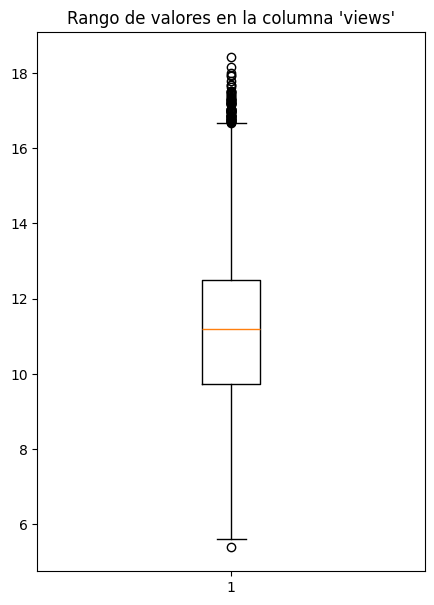

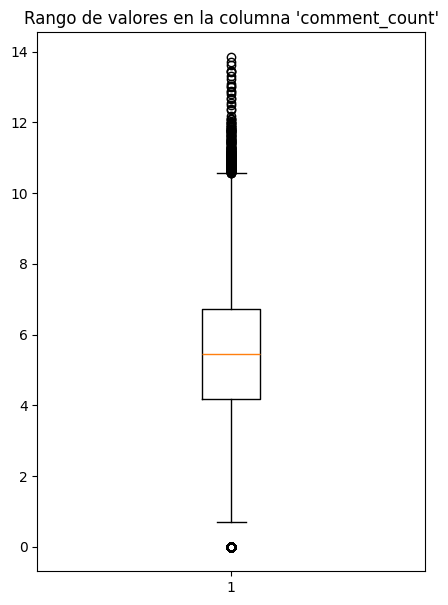

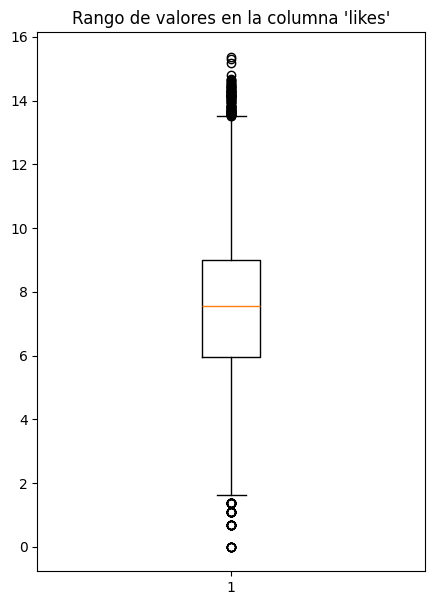

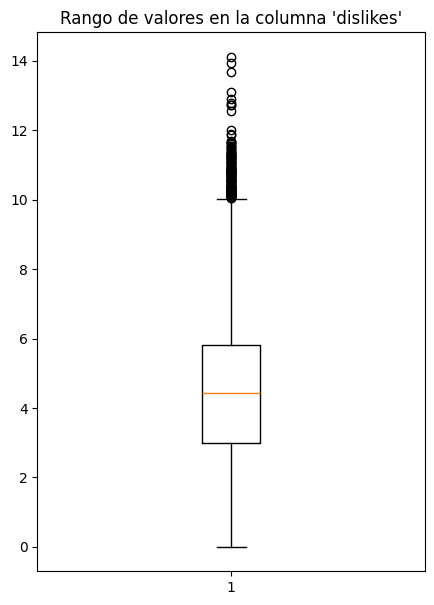

In [ ]:
for elem in col_log:
  plt.figure(figsize=(5,7))
  plt.boxplot(df[elem])
  plt.title(f"Rango de valores en la columna '{elem}'")
  plt.show()

Visualización final del conjunto de datos

In [ ]:
df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,ratio_likes_dislikes,ratio_views_comments
0,Ro6eob0LrCY,2017-11-14,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",12.267647,10.284728,7.010312,...,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,Ile De France,48.533302,2.666648,POINT (2.666648314 48.53330243),26.403968,55.710320
1,Yo84eqYwP98,2017-11-14,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],12.977848,9.550591,6.356108,...,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,Corse,41.927065,8.728294,POINT (8.728293821999999 41.92706484),24.355286,372.393287
2,ceqntSXE-10,2017-11-14,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",13.086017,11.241156,6.167516,...,False,False,False,Une nouvelle dose de dessins animés français e...,Limousin,45.150408,1.533332,POINT (1.533332477 45.15040814),100.000000,50.323870
3,WuTFI5qftCE,2017-11-14,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",13.737789,11.350595,6.309918,...,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o...",Moyotte,-12.787089,45.275004,POINT (45.27500362 -12.78708901),100.000000,214.967937
4,ee6OFs8TdEg,2017-11-14,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",11.861432,8.998508,4.276666,...,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...,Pays De La Loire,47.480008,-0.530030,POINT (-0.530029949 47.48000755),100.000000,293.973029
5,teXaL6GdQRk,2017-11-14,STRANGER JOKES : Jokes de Papa avec les teens ...,"Le Jeu, C'est Sérieux",23,2017-11-13T15:48:57.000Z,"Stranger Jokes""|""Jokes de Papa""|""Stranger Thin...",11.858308,9.571784,5.308268,...,False,False,False,Contenu commandité par Netflix France.\nInspir...,Martinique,14.610412,-61.080029,POINT (-61.08002914 14.6104118),70.709360,337.925837
6,nduL7G_gJoY,2017-11-14,De retour dans le Manoir hanté avec le Grand J...,silent jill,24,2017-11-12T19:00:08.000Z,"fantome""|""esprits""|""spiritisme""|""hanté""|""ouija...",12.142355,9.136263,7.230563,...,False,False,False,"Bonsoir à tous, \nJe tenais beaucoup à retourn...",Guadeloupe,16.241475,-61.532999,POINT (-61.5329989 16.24147504),6.719247,77.542975
7,QmpWE_SODZA,2017-11-14,"T'es qui toi ? Squeezie, le youtubeur aux 4 mi...",Salut les terriens !,24,2017-11-13T17:30:01.000Z,"salut les terriens""|""squeezie""|""jeux videos""|""...",11.419175,7.422971,7.551187,...,False,False,False,"Dans Salut Les Terriens, Thierry Ardisson, reç...",Ile De France,48.533302,2.666648,POINT (2.666648314 48.53330243),0.879202,129.702279
8,GBVxEpQr8R8,2017-11-14,ON VOUS DÉVOILE NOTRE VRAI SALAIRE,Mcfly & Carlito,24,2017-11-12T08:59:25.000Z,"mcfly""|""carlito""|""golden moustache""|""fatshow""|...",14.666064,12.209058,8.702510,...,False,False,False,Nouvelle vidéo tous les dimanches matins 10h. ...,Bourgogne,46.983733,3.166669,POINT (3.166669473 46.98373293),33.327463,308.994324
9,0RFhWyM6qbA,2017-11-14,Benzema balance ses dur vérités Deschamps et L...,HALIRIPA,22,2017-11-12T20:16:45.000Z,"Karim benzema football""|""Benzema vs cristiano ...",13.361752,8.690306,6.582025,...,False,False,False,Abonnez-vous et partagez au max la famille,Poitou Charentes,46.583292,0.333277,POINT (0.333276529 46.58329226),8.222683,428.056604


Descargar el conjunto de datos limpio

In [ ]:
df.to_csv('/content/drive/My Drive/DataScienceTF/FRvideos_cc50_202101_clean.csv', index=False)

# **MODELIZAR Y EVALUAR LOS RESULTADOS**

**¿Qué categorías de videos son las de mayor tendencia?**

<ipython-input-23-08d9a820db53>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


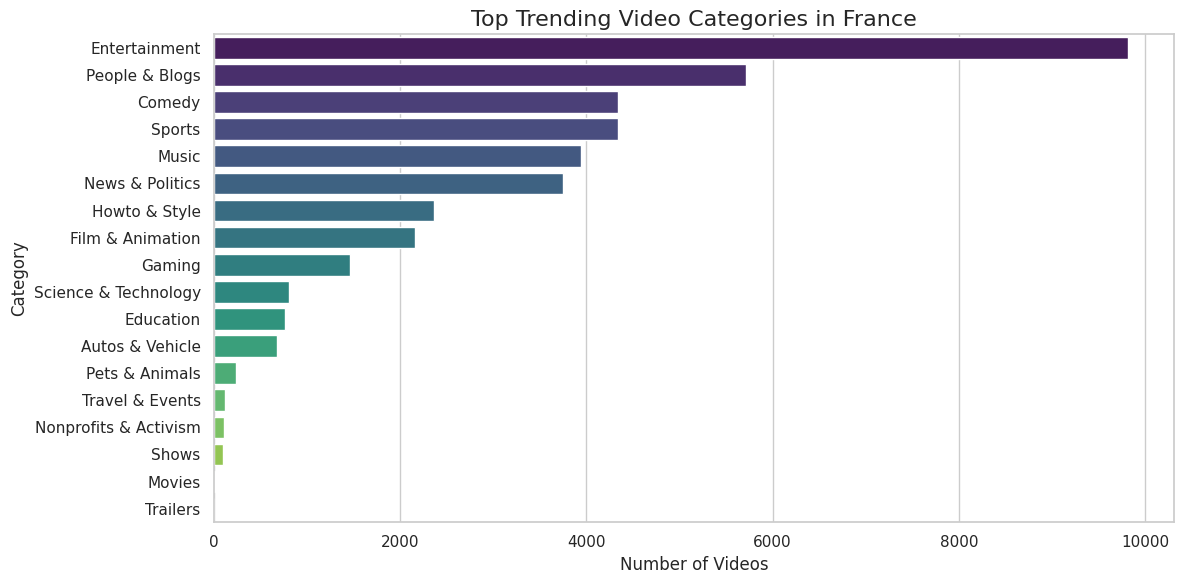

In [ ]:


# Contar la cantidad de videos por categoría
category_frequency = df_original['category_id'].value_counts()

# Mapear los nombres de las categorías
category_frequency_named = category_frequency.rename(index=categorias)

# Convertir a DataFrame para facilitar el análisis
category_trend_df = category_frequency_named.reset_index()
category_trend_df.columns = ['Category', 'Count']

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de barras para visualizar las categorías más populares
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=category_trend_df,
    x="Count",
    y="Category",
    palette="viridis",
    order=category_trend_df.sort_values(by="Count", ascending=False)["Category"]
)

# Personalizar el gráfico
barplot.set_title("Top Trending Video Categories in France", fontsize=16)
barplot.set_xlabel("Number of Videos", fontsize=12)
barplot.set_ylabel("Category", fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?**

<ipython-input-24-2426cf4d00fa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


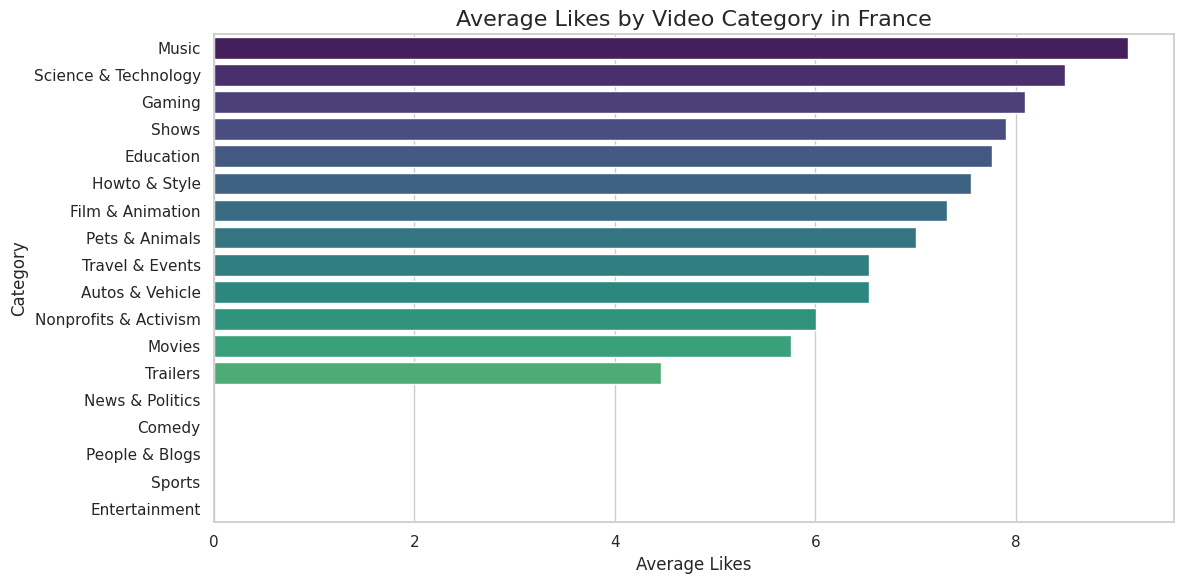

In [ ]:
# Calcular el promedio de likes por categoría
likes_by_category = df_original.groupby('category_id')['likes'].mean()

# Mapear los nombres de las categorías
likes_by_category_named = likes_by_category.rename(index=categorias)

# Convertir a DataFrame para facilitar el análisis
likes_trend_df = likes_by_category_named.reset_index()
likes_trend_df.columns = ['Category', 'Average Likes']

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de barras para visualizar las categorías con más y menos likes
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=likes_trend_df,
    x="Average Likes",
    y="Category",
    palette="viridis",
    order=likes_trend_df.sort_values(by="Average Likes", ascending=False)["Category"]
)

# Personalizar el gráfico
barplot.set_title("Average Likes by Video Category in France", fontsize=16)
barplot.set_xlabel("Average Likes", fontsize=12)
barplot.set_ylabel("Category", fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No megusta”?**

<ipython-input-25-c95983da9c1a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


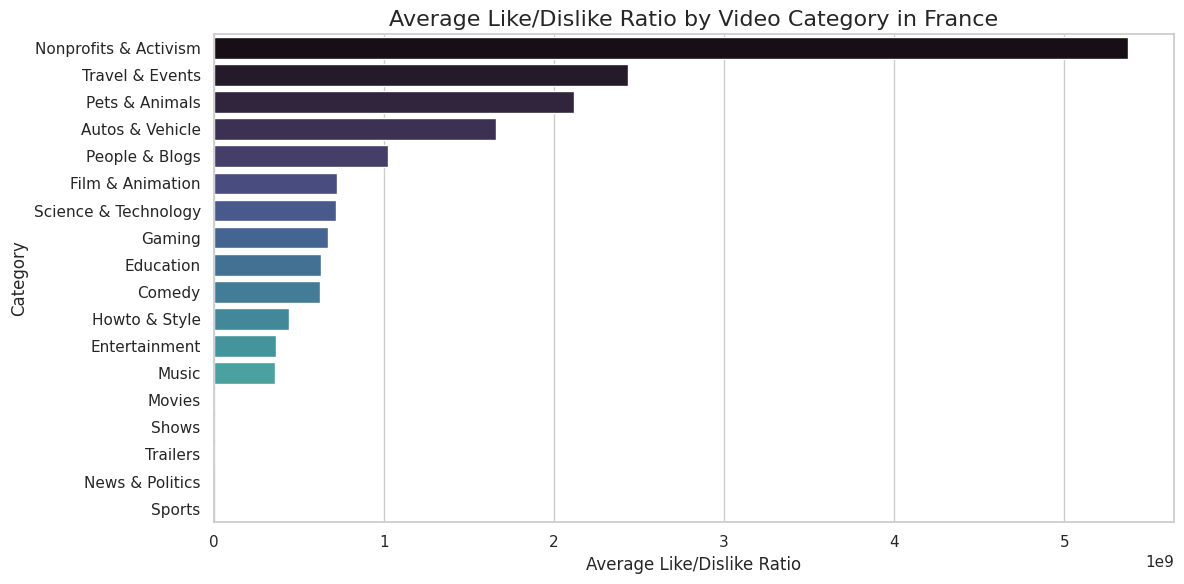

In [ ]:
# Calcular la proporción Me gusta / No me gusta
df['like_dislike_ratio'] = df['likes'] / (df['dislikes'] + 1e-10)

# Agrupar por categoría y calcular el promedio de la proporción
ratio_by_category = df.groupby('category_id')['like_dislike_ratio'].mean()

# Mapear los nombres de las categorías
ratio_by_category_named = ratio_by_category.rename(index=categorias)

# Convertir a DataFrame para análisis
ratio_trend_df = ratio_by_category_named.reset_index()
ratio_trend_df.columns = ['Category', 'Average Like/Dislike Ratio']

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=ratio_trend_df,
    x="Average Like/Dislike Ratio",
    y="Category",
    palette="mako",
    order=ratio_trend_df.sort_values(by="Average Like/Dislike Ratio", ascending=False)["Category"]
)

# Personalizar el gráfico
barplot.set_title("Average Like/Dislike Ratio by Video Category in France", fontsize=16)
barplot.set_xlabel("Average Like/Dislike Ratio", fontsize=12)
barplot.set_ylabel("Category", fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas" / “Comentarios”?**


<ipython-input-26-20b9c73ae93a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


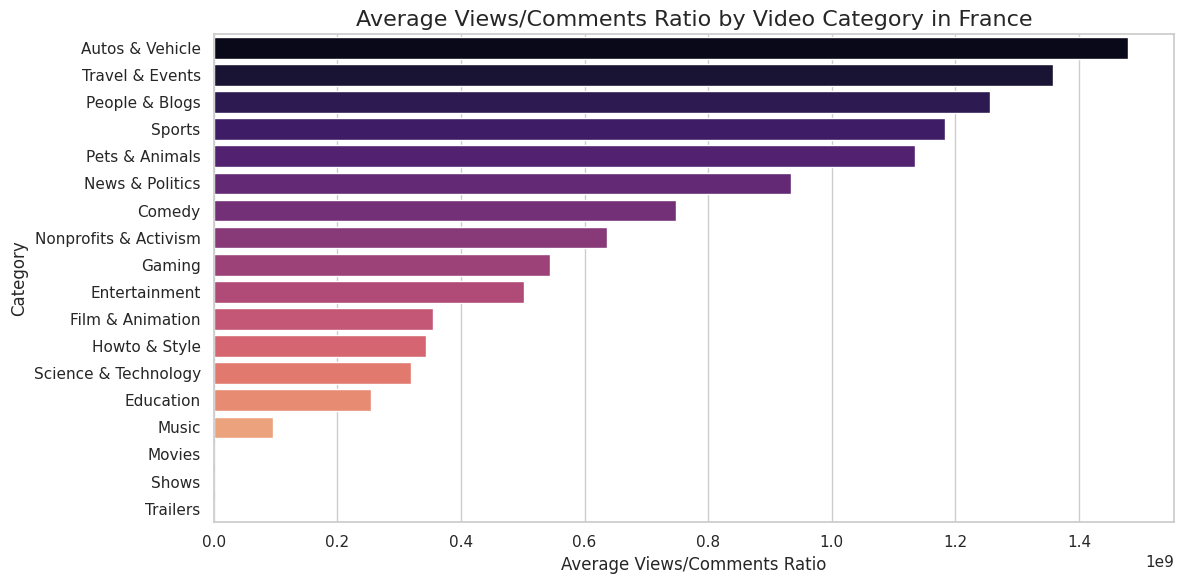

In [ ]:
# Calcular la proporción Vistas / Comentarios
df['views_comments_ratio'] = df['views'] / (df['comment_count'] + 1e-10)

# Agrupar por categoría y calcular el promedio de la proporción
ratio_by_category = df.groupby('category_id')['views_comments_ratio'].mean()

# Mapear los nombres de las categorías
ratio_by_category_named = ratio_by_category.rename(index=categorias)

# Convertir a DataFrame para análisis
ratio_trend_df = ratio_by_category_named.reset_index()
ratio_trend_df.columns = ['Category', 'Average Views/Comments Ratio']

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=ratio_trend_df,
    x="Average Views/Comments Ratio",
    y="Category",
    palette="magma",
    order=ratio_trend_df.sort_values(by="Average Views/Comments Ratio", ascending=False)["Category"]
)

# Personalizar el gráfico
barplot.set_title("Average Views/Comments Ratio by Video Category in France", fontsize=16)
barplot.set_xlabel("Average Views/Comments Ratio", fontsize=12)
barplot.set_ylabel("Category", fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?**

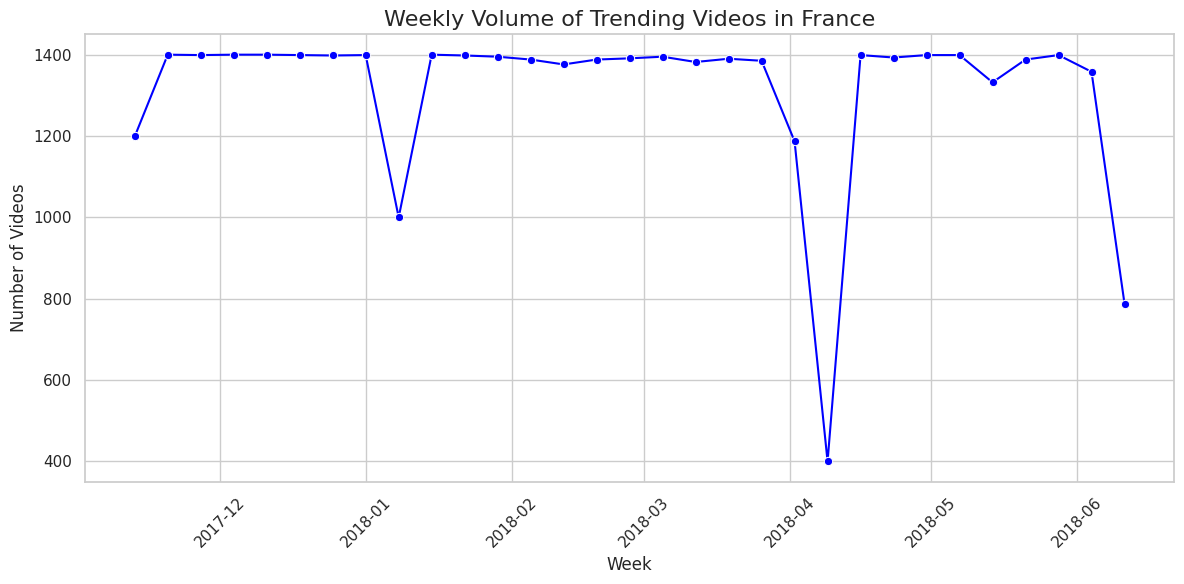

In [ ]:
# Agrupar por semanas
df_original['week'] = df_original['trending_date'].dt.to_period('W').dt.start_time
trend_volume_by_week = df_original.groupby('week').size()

# Convertir a DataFrame para facilitar el análisis
trend_volume_week_df = trend_volume_by_week.reset_index()
trend_volume_week_df.columns = ['Week', 'Video Count']

# Crear un gráfico de líneas para visualizar la tendencia semanal
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(
    data=trend_volume_week_df,
    x="Week",
    y="Video Count",
    marker="o",
    color="blue"
)

# Personalizar el gráfico
lineplot.set_title("Weekly Volume of Trending Videos in France", fontsize=16)
lineplot.set_xlabel("Week", fontsize=12)
lineplot.set_ylabel("Number of Videos", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?**

<ipython-input-28-082f46c104a8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


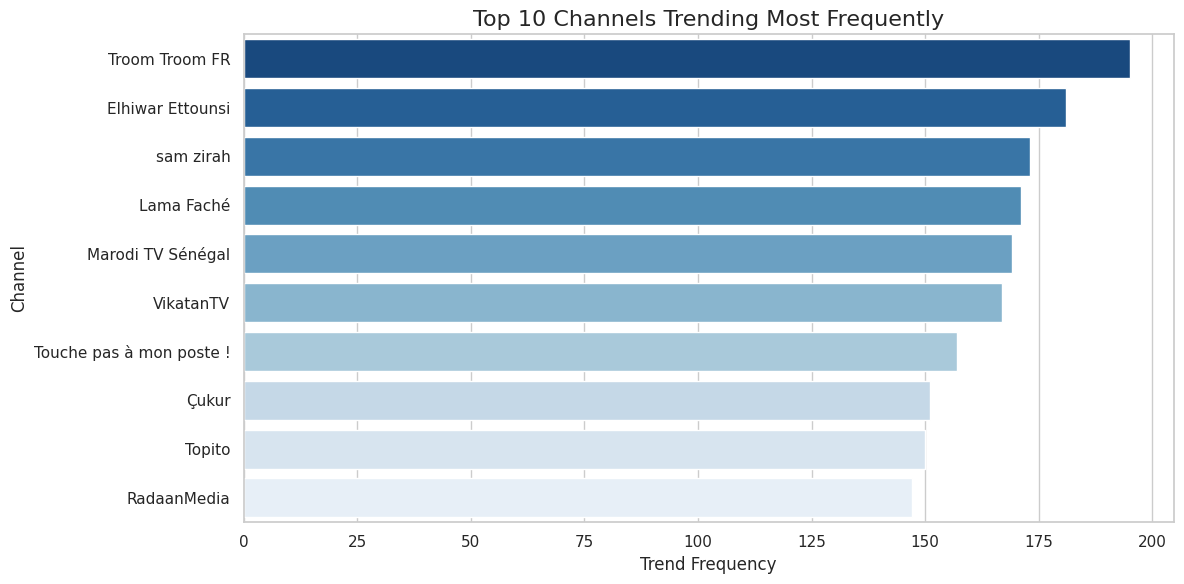

<ipython-input-28-082f46c104a8>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


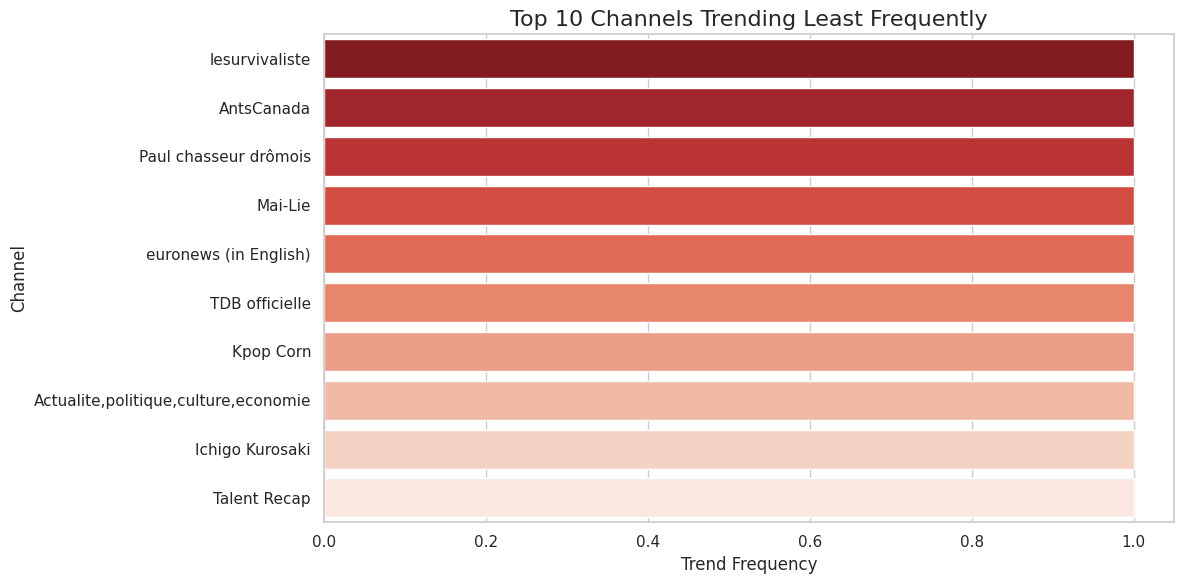

In [ ]:
# Contar la frecuencia de tendencia por canal
channel_trend_frequency = df['channel_title'].value_counts()

# Crear un DataFrame a partir de los datos
channel_trend_df = channel_trend_frequency.reset_index()
channel_trend_df.columns = ['Channel', 'Trend Frequency']

# Identificar los canales con mayor y menor frecuencia
most_frequent_channels = channel_trend_df.head(10)  # Top 10 canales con más tendencia
least_frequent_channels = channel_trend_df.tail(10)  # Últimos 10 canales con menos tendencia

# Visualizar los canales con mayor frecuencia
plt.figure(figsize=(12, 6))
sns.barplot(
    data=most_frequent_channels,
    x="Trend Frequency",
    y="Channel",
    palette="Blues_r"
)
plt.title("Top 10 Channels Trending Most Frequently", fontsize=16)
plt.xlabel("Trend Frequency", fontsize=12)
plt.ylabel("Channel", fontsize=12)
plt.tight_layout()
plt.show()

# Visualizar los canales con menor frecuencia
plt.figure(figsize=(12, 6))
sns.barplot(
    data=least_frequent_channels,
    x="Trend Frequency",
    y="Channel",
    palette="Reds_r"
)
plt.title("Top 10 Channels Trending Least Frequently", fontsize=16)
plt.xlabel("Trend Frequency", fontsize=12)
plt.ylabel("Channel", fontsize=12)
plt.tight_layout()
plt.show()

**¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?**

<ipython-input-29-85f3e6f7ee16>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


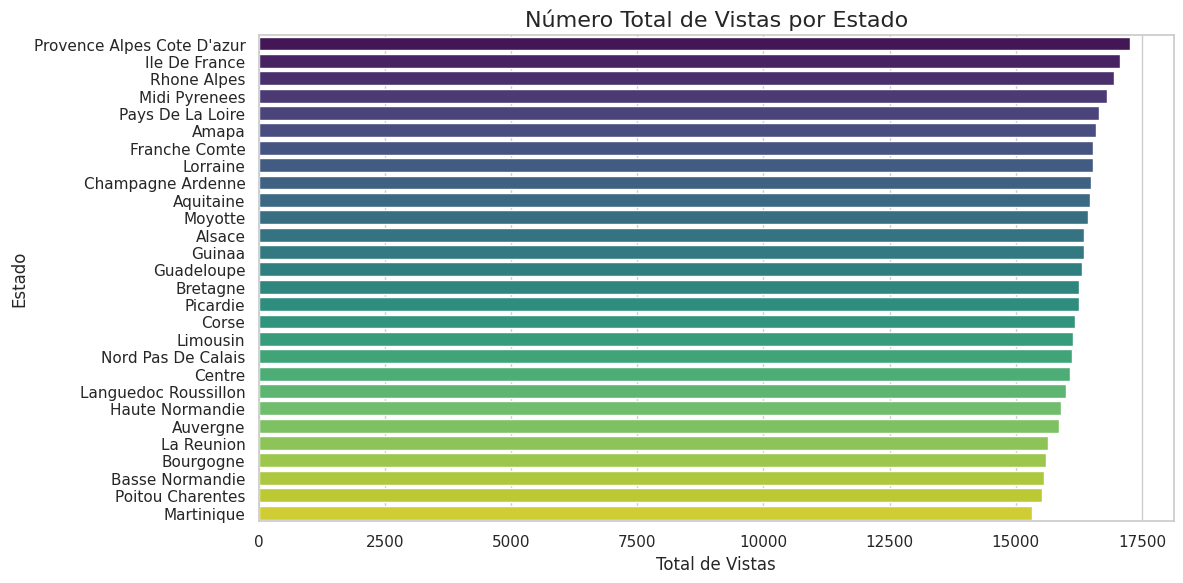

<ipython-input-29-85f3e6f7ee16>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


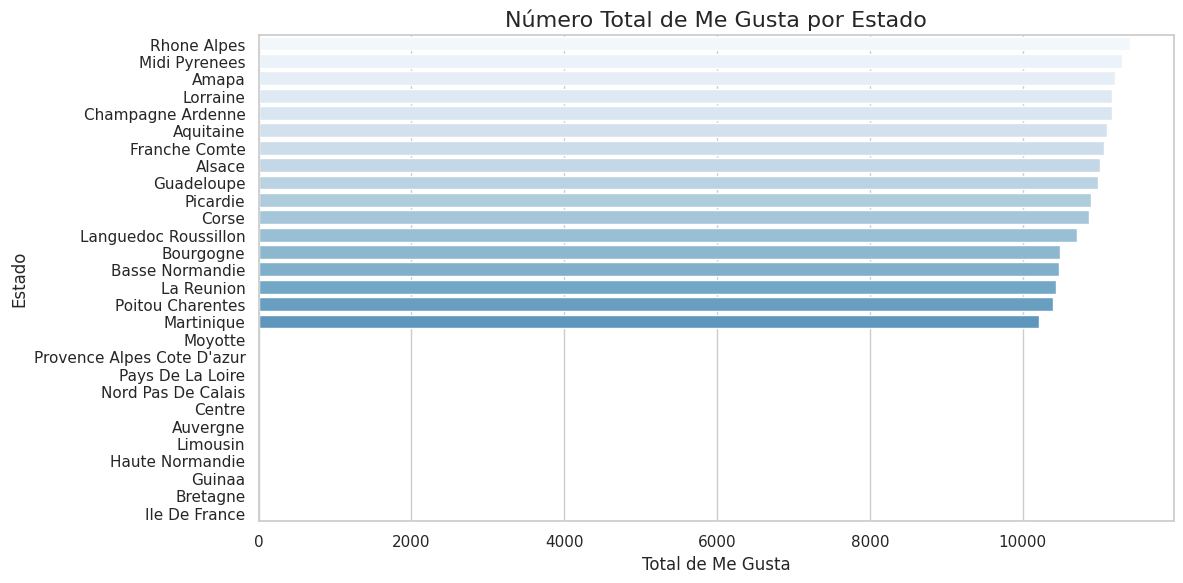

<ipython-input-29-85f3e6f7ee16>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


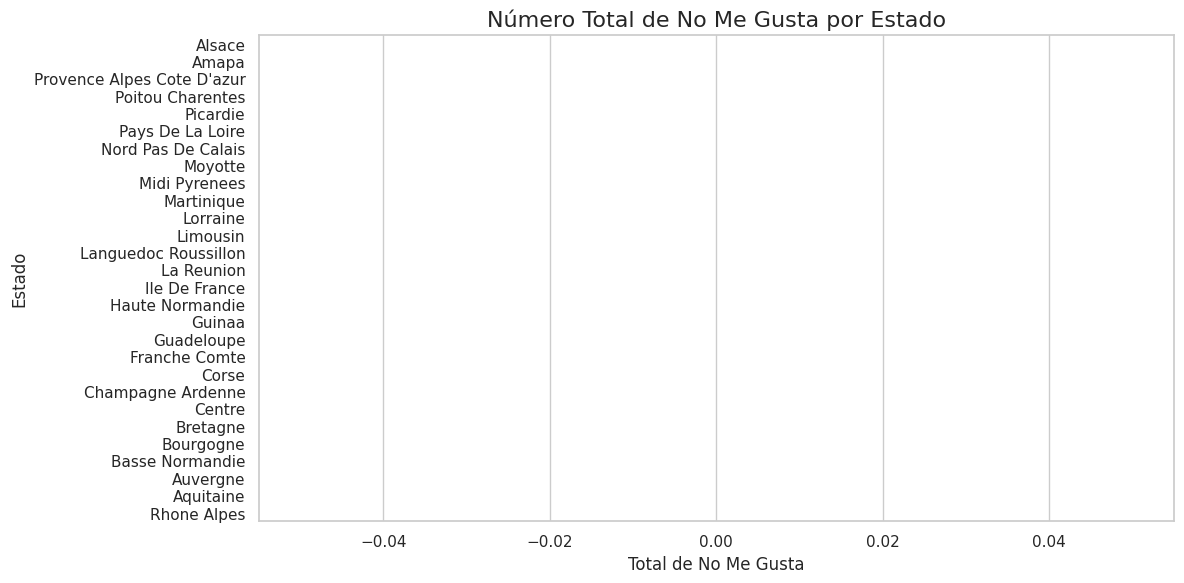

In [ ]:
# Agrupar los datos por estado y calcular las sumas de "Vistas", "Me gusta" y "No me gusta"
state_summary = df.groupby('state')[['views', 'likes', 'dislikes']].sum().reset_index()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Visualizar las "Vistas" por estado
plt.figure(figsize=(12, 6))
sns.barplot(
    data=state_summary.sort_values(by='views', ascending=False),
    x='views',
    y='state',
    palette='viridis'
)
plt.title('Número Total de Vistas por Estado', fontsize=16)
plt.xlabel('Total de Vistas', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.tight_layout()
plt.show()

# Visualizar los "Me gusta" por estado
plt.figure(figsize=(12, 6))
sns.barplot(
    data=state_summary.sort_values(by='likes', ascending=False),
    x='likes',
    y='state',
    palette='Blues'
)
plt.title('Número Total de Me Gusta por Estado', fontsize=16)
plt.xlabel('Total de Me Gusta', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.tight_layout()
plt.show()

# Visualizar los "No me gusta" por estado
plt.figure(figsize=(12, 6))
sns.barplot(
    data=state_summary.sort_values(by='dislikes', ascending=False),
    x='dislikes',
    y='state',
    palette='Reds'
)
plt.title('Número Total de No Me Gusta por Estado', fontsize=16)
plt.xlabel('Total de No Me Gusta', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.tight_layout()
plt.show()

**¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?**

<ipython-input-29-4c1745249618>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


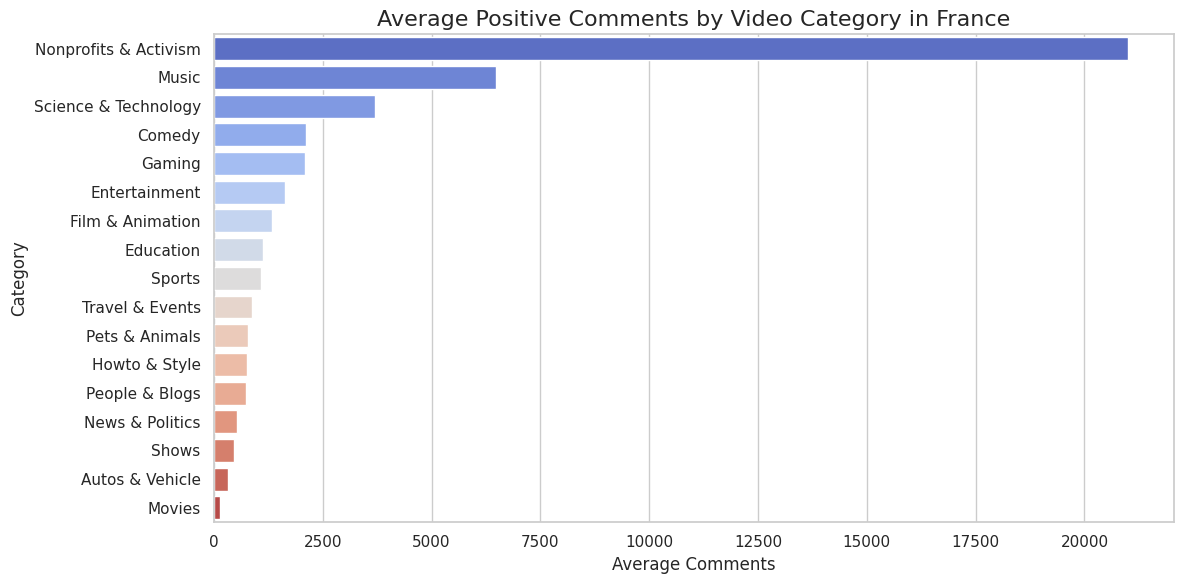

In [ ]:
# Filtrar los videos con comentarios habilitados
videos_with_comments = df_original[df_original['comments_disabled'] == False]

# Calcular el promedio de comentarios por categoría
comments_by_category = videos_with_comments.groupby('category_id')['comment_count'].mean()

# Mapear los nombres de las categorías
comments_by_category_named = comments_by_category.rename(index=categorias)

# Convertir a DataFrame para facilitar el análisis
comments_trend_df = comments_by_category_named.reset_index()
comments_trend_df.columns = ['Category', 'Average Comments']

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de barras para visualizar la cantidad promedio de comentarios
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=comments_trend_df,
    x="Average Comments",
    y="Category",
    palette="coolwarm",
    order=comments_trend_df.sort_values(by="Average Comments", ascending=False)["Category"]
)

# Personalizar el gráfico
barplot.set_title("Average Positive Comments by Video Category in France", fontsize=16)
barplot.set_xlabel("Average Comments", fontsize=12)
barplot.set_ylabel("Category", fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?**

Evaluar factibilidad

Exploracion y correlacion

In [ ]:
# Filtrar solo las columnas relevantes
relevant_columns = ['views', 'likes', 'dislikes', 'comment_count', 'category_id']
data_filtered = df_original[relevant_columns].dropna()

# Calcular el mapa de correlación
correlation_matrix = data_filtered.corr()

# Visualizar el mapa de calor de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Variables for Prediction")
plt.show()

Modelo predictivo inicial (regresion para vistas)

In [ ]:
# Variables independientes (X) y dependiente (y)
X = df_original[['likes', 'dislikes', 'comment_count', 'category_id']]
y = df_original['views']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R² Score: 0.85
Mean Squared Error: 697944116279.58


Debido a que las correlaciones son fuertes y el R² del modelo es alto (mayor a 0.7), entonces es factible predecir estas variables (número de “Vistas” o “Me gusta” o “No me gusta”).